In [1]:
import pandas as pd

# Load the CSV file to examine its contents
file_path = 'Cube_Geometry_Data_Final.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Geometry,Speed (mm/s),Flowrate (Hz),Total Print Height (mm),Layer 1 Height (mm),Layer 2 Height (mm),Layer 3 Height (mm),Layer 4 Height (mm),Layer 5 Height (mm),Layer 6 Height (mm),Layer 7 Height (mm),Layer 8 Height (mm),Layer 9 Height (mm),Layer 10 Height (mm)
0,Cube,75,35,106.7048,1.9352,10.0724,11.2861,11.2863,12.1057,12.0478,11.4972,12.3992,12.0007,12.0742
1,Cube,75,35,107.9695,5.0072,10.9927,11.2936,11.2893,11.6298,10.9991,11.7209,11.4802,12.3084,11.2483
2,Cube,75,35,106.0440,0.0000,10.2591,11.6922,12.0619,11.1992,11.5683,12.4306,11.4592,12.2763,13.0972
3,Cube,75,35,103.6648,0.0000,10.3328,12.5962,11.9681,11.1818,9.9079,10.6151,12.0308,12.7281,12.3040
4,Cube,75,35,106.2228,2.4301,10.2433,11.4550,10.9347,11.6283,11.2812,10.5878,11.4553,12.4960,13.7111


Exponential: Deformation = -38.8328 * exp(-2.3870 * layers) + -0.2915
Polynomial: Deformation = -0.0773 * layers^2 + 1.0550 * layers + -3.5123
Linear: Deformation = 0.2051 * layers + -1.8125
         Model       MAE      RMSE       R^2
0  Exponential  0.123597  0.153812  0.979495
1   Polynomial  0.582128  0.701134  0.573937
2       Linear  0.674600  0.898225  0.300733


C:\Users\Ahmad\AppData\Local\Temp\ipykernel_7836\4252411972.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  deformations = layer_heights.apply(lambda row: row[layer_idx] - row[layer_idx:].mean(), axis=1)


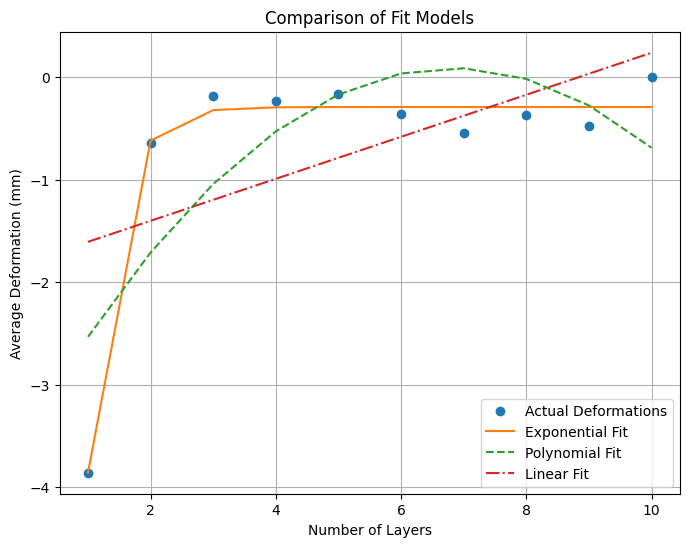

In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Model 1: Exponential Function
def exp_function(layers, a, b, c):
    return a * np.exp(-b * layers) + c

# Model 2: Polynomial Function (2nd degree)
def poly_function(layers, a, b, c):
    return a * layers**2 + b * layers + c

# Model 3: Linear Function
def linear_function(layers, a, b):
    return a * layers + b

# Load your data (replace this with the correct path to your CSV file)
# data = pd.read_csv('your_file.csv')

# Extract the columns corresponding to layer heights
layer_columns = [col for col in data.columns if 'Layer' in col]
layer_heights = data[layer_columns]

# Compute the average deformation per number of layers deposited on top
layer_count = np.arange(1, len(layer_columns) + 1)
average_deformation_per_top_layers = []

for layer_idx in range(len(layer_columns)):
    # Calculate average deformation for the current layer and layers deposited on top
    deformations = layer_heights.apply(lambda row: row[layer_idx] - row[layer_idx:].mean(), axis=1)
    average_deformation_per_top_layers.append(deformations.mean())

# Fit each model to the data
popt_exp, _ = curve_fit(exp_function, layer_count, average_deformation_per_top_layers)
popt_poly, _ = curve_fit(poly_function, layer_count, average_deformation_per_top_layers)
popt_linear, _ = curve_fit(linear_function, layer_count, average_deformation_per_top_layers)

# Generate predictions for each model
predicted_exp = exp_function(layer_count, *popt_exp)
predicted_poly = poly_function(layer_count, *popt_poly)
predicted_linear = linear_function(layer_count, *popt_linear)

# Compute RMSE for each model
def compute_rmse(actual, predicted):
    errors = actual - predicted
    rmse = np.sqrt(np.mean(errors**2))
    return rmse

# RMSE calculations for each model
rmse_exp = compute_rmse(average_deformation_per_top_layers, predicted_exp)
rmse_poly = compute_rmse(average_deformation_per_top_layers, predicted_poly)
rmse_linear = compute_rmse(average_deformation_per_top_layers, predicted_linear)

# Mean Absolute Error (MAE) for each model
def compute_mae(actual, predicted):
    absolute_errors = np.abs(actual - predicted)
    mae = np.mean(absolute_errors)
    return mae

# MAE calculations for each model
mae_exp = compute_mae(average_deformation_per_top_layers, predicted_exp)
mae_poly = compute_mae(average_deformation_per_top_layers, predicted_poly)
mae_linear = compute_mae(average_deformation_per_top_layers, predicted_linear)

# R^2 metric for each model
def compute_r_squared(actual, predicted):
    ss_res = np.sum((actual - predicted) ** 2)  # Residual sum of squares
    ss_tot = np.sum((actual - np.mean(actual)) ** 2)  # Total sum of squares
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

# R^2 calculations for each model
r_squared_exp = compute_r_squared(average_deformation_per_top_layers, predicted_exp)
r_squared_poly = compute_r_squared(average_deformation_per_top_layers, predicted_poly)
r_squared_linear = compute_r_squared(average_deformation_per_top_layers, predicted_linear)

# Display the fit equations for each model
fit_equation_exp = f"Exponential: Deformation = {popt_exp[0]:.4f} * exp(-{popt_exp[1]:.4f} * layers) + {popt_exp[2]:.4f}"
fit_equation_poly = f"Polynomial: Deformation = {popt_poly[0]:.4f} * layers^2 + {popt_poly[1]:.4f} * layers + {popt_poly[2]:.4f}"
fit_equation_linear = f"Linear: Deformation = {popt_linear[0]:.4f} * layers + {popt_linear[1]:.4f}"

print(fit_equation_exp)
print(fit_equation_poly)
print(fit_equation_linear)

# Display the evaluation results
evaluation_results = pd.DataFrame({
    'Model': ['Exponential', 'Polynomial', 'Linear'],
    'MAE': [mae_exp, mae_poly, mae_linear],
    'RMSE': [rmse_exp, rmse_poly, rmse_linear],
    'R^2': [r_squared_exp, r_squared_poly, r_squared_linear]
})

print(evaluation_results)

# Optional: Visualize the fit of each model
plt.figure(figsize=(8, 6))
plt.plot(layer_count, average_deformation_per_top_layers, 'o', label='Actual Deformations')
plt.plot(layer_count, predicted_exp, '-', label='Exponential Fit')
plt.plot(layer_count, predicted_poly, '--', label='Polynomial Fit')
plt.plot(layer_count, predicted_linear, '-.', label='Linear Fit')
plt.xlabel('Number of Layers')
plt.ylabel('Average Deformation (mm)')
plt.legend()
plt.title('Comparison of Fit Models')
plt.grid(True)
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the correlation matrix
correlation_matrix = data[process_columns + ['Average Layer Height (mm)']].corr().to_numpy()

# Define the labels for the heatmap
labels = ['Speed (mm/s)', 'Flowrate (Hz)', 'Average Layer Height (mm)']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the heatmap
cax = ax.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Add color bar
cbar = fig.colorbar(cax)

# Add labels to the axes
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

# Add the labels to the x and y axis
ax.set_xticklabels(labels, fontsize=12, rotation=45, ha='right')
ax.set_yticklabels(labels, fontsize=12)

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, f"{correlation_matrix[i, j]:.2f}",
                       ha="center", va="center", color="black", fontsize=14)

# Adjust layout
plt.title('Correlation Heatmap: Process Parameters and Layer Heights', fontsize=16)
plt.tight_layout()

# Display the plot
plt.show()


NameError: name 'process_columns' is not defined

In [4]:
import matplotlib.pyplot as plt

# 1. Scatter plot of Speed vs Average Layer Height with Flowrate as color
plt.figure(figsize=(8, 6))
plt.scatter(data['Speed (mm/s)'], data['Average Layer Height (mm)'], c=data['Flowrate (Hz)'], cmap='viridis')
plt.colorbar(label='Flowrate (Hz)')
plt.xlabel('Speed (mm/s)')
plt.ylabel('Average Layer Height (mm)')
plt.title('Speed vs Average Layer Height (Color = Flowrate)')
plt.grid(True)
plt.show()

# 2. Boxplot of Average Layer Height grouped by Speed ranges
speed_bins = pd.cut(data['Speed (mm/s)'], bins=[50, 75, 100, 125, 150])
plt.figure(figsize=(8, 6))
sns.boxplot(x=speed_bins, y=data['Average Layer Height (mm)'])
plt.xlabel('Speed (mm/s) Range')
plt.ylabel('Average Layer Height (mm)')
plt.title('Boxplot of Average Layer Height for Different Speed Ranges')
plt.grid(True)
plt.show()

# 3. Distribution of Flowrate
plt.figure(figsize=(8, 6))
sns.histplot(data['Flowrate (Hz)'], kde=True, bins=10)
plt.xlabel('Flowrate (Hz)')
plt.ylabel('Frequency')
plt.title('Distribution of Flowrate (Hz)')
plt.grid(True)
plt.show()

# 4. Pairplot of process parameters and average layer height
sns.pairplot(data[['Speed (mm/s)', 'Flowrate (Hz)', 'Average Layer Height (mm)']])
plt.suptitle('Pairplot of Process Parameters and Average Layer Height', y=1.02)
plt.show()


KeyError: 'Average Layer Height (mm)'

<Figure size 800x600 with 0 Axes>

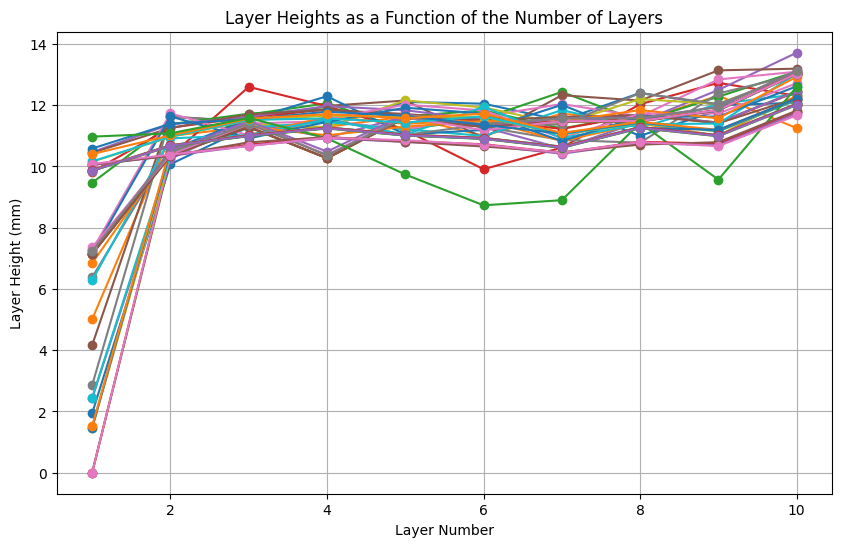

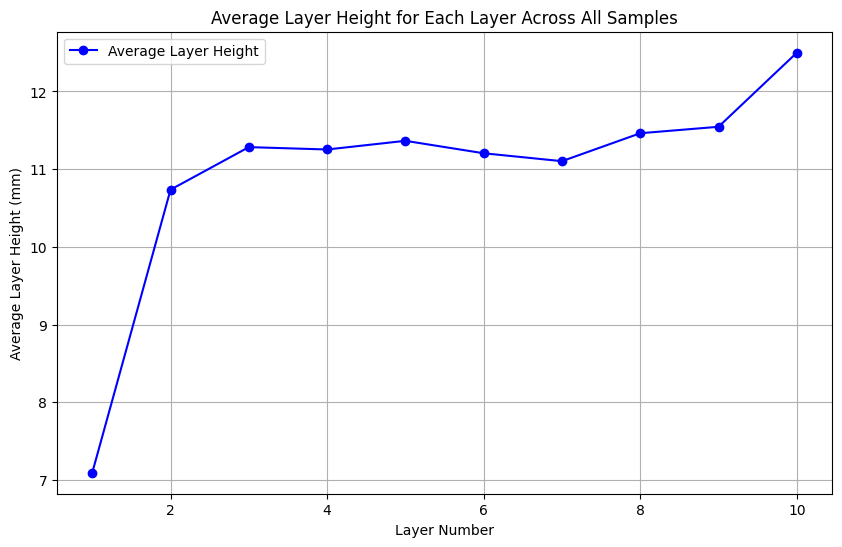

In [5]:
# 1. Line plot of each layer's height as a function of the number of layers
plt.figure(figsize=(10, 6))

# Plotting each sample's layer heights
for i in range(len(data)):
    plt.plot(range(1, len(layer_columns) + 1), data.iloc[i][layer_columns], marker='o', label=f'Sample {i+1}')

plt.xlabel('Layer Number')
plt.ylabel('Layer Height (mm)')
plt.title('Layer Heights as a Function of the Number of Layers')
plt.grid(True)
plt.show()



# 4. Line plot: Average layer height across all samples for each layer
plt.figure(figsize=(10, 6))
average_layer_heights = data[layer_columns].mean(axis=0)
plt.plot(range(1, len(layer_columns) + 1), average_layer_heights, marker='o', color='b', label='Average Layer Height')
plt.xlabel('Layer Number')
plt.ylabel('Average Layer Height (mm)')
plt.title('Average Layer Height for Each Layer Across All Samples')
plt.grid(True)
plt.legend()
plt.show()


KeyError: 'Average Layer Height (mm)'

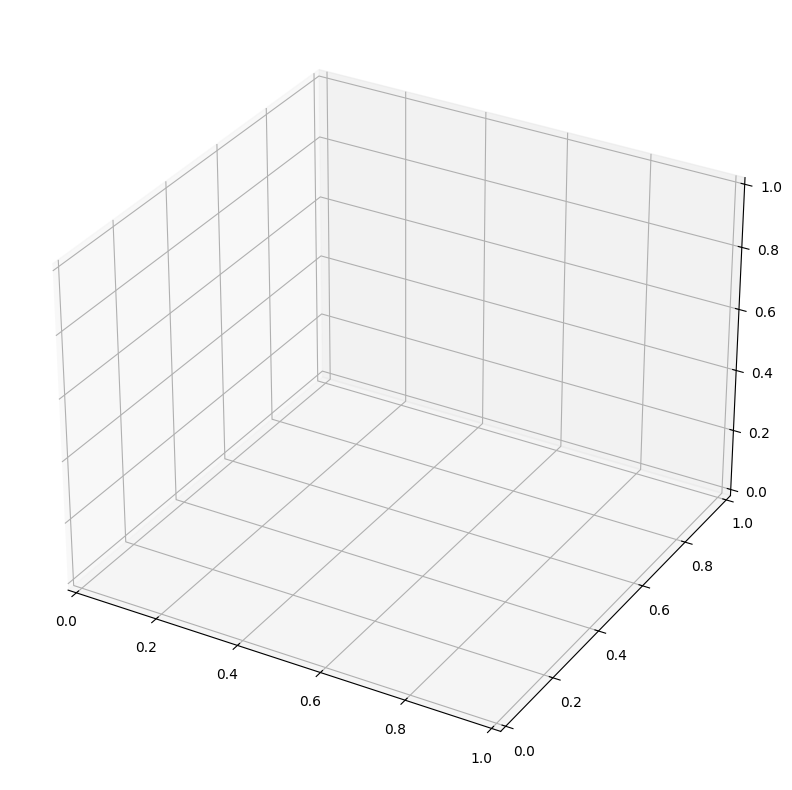

In [6]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# 1. 3D Scatter Plot of Speed, Flowrate, and Average Layer Height
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Speed (mm/s)'], data['Flowrate (Hz)'], data['Average Layer Height (mm)'], c=data['Average Layer Height (mm)'], cmap='coolwarm')
ax.set_xlabel('Speed (mm/s)')
ax.set_ylabel('Flowrate (Hz)')
ax.set_zlabel('Average Layer Height (mm)')
plt.title('3D Scatter Plot: Speed, Flowrate, and Average Layer Height')
plt.show()



# 4. Histogram of Layer Height Deviations (deviation from the mean across layers)
plt.figure(figsize=(8, 6))
layer_height_deviation = data[layer_columns].sub(data[layer_columns].mean(axis=1), axis=0).stack()
sns.histplot(layer_height_deviation, kde=True)
plt.xlabel('Layer Height Deviation (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of Layer Height Deviations')
plt.grid(True)
plt.show()

# 5. Jointplot of Flowrate vs Speed and its effect on Average Layer Height
sns.jointplot(x='Speed (mm/s)', y='Flowrate (Hz)', data=data, hue='Average Layer Height (mm)', kind='scatter', palette='viridis')
plt.suptitle('Jointplot of Speed and Flowrate (Colored by Average Layer Height)', y=1.02)
plt.show()

# 6. FacetGrid of Layer Height Distributions by Speed Groups
# Create a new column for speed bins
data['Speed Bins'] = pd.cut(data['Speed (mm/s)'], bins=[50, 75, 100, 125, 150], labels=['50-75', '75-100', '100-125', '125-150'])

# Create the FacetGrid based on these bins
g = sns.FacetGrid(data, col='Speed Bins', height=4, aspect=1)
g.map(sns.histplot, 'Average Layer Height (mm)', kde=True)
g.add_legend()
plt.suptitle('Distribution of Average Layer Height by Speed Ranges', y=1.02)
plt.show()

# 7. PCA (Principal Component Analysis) for Layer Heights and Process Parameters
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(data[layer_columns + process_columns])

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Average Layer Height (mm)'], cmap='plasma')
plt.colorbar(label='Average Layer Height (mm)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Layer Heights and Process Parameters')
plt.grid(True)
plt.show()

# 8. Boxenplot of Layer Heights for All Layers
plt.figure(figsize=(10, 6))
sns.boxenplot(data=data[layer_columns])
plt.xlabel('Layer Number')
plt.ylabel('Layer Height (mm)')
plt.title('Boxenplot of Layer Heights for Each Layer')
plt.grid(True)
plt.show()


In [ ]:
# 8. Boxenplot of Layer Heights for All Layers
plt.figure(figsize=(20, 10))
sns.boxenplot(data=data[layer_columns])
plt.xlabel('Layer Number')
plt.ylabel('Layer Height (mm)')
plt.title('Boxenplot of Layer Heights for Each Layer')
plt.grid(True)
plt.savefig('Fig')
plt.show()

C:\Users\Ahmad\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ahmad\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ahmad\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ahmad\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

# Training Models

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for regression analysis
X = data[['Speed (mm/s)', 'Flowrate (Hz)']]  # Independent variables
y = data['Average Layer Height (mm)']  # Dependent variable (average layer height)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model with the data
model.fit(X, y)

# Get the coefficients (slope) and intercept (constant term)
coefficients = model.coef_
intercept = model.intercept_

# Perform predictions
y_pred = model.predict(X)

# Calculate R-squared for the model
r_squared = model.score(X, y)

# Display the regression equation and R-squared value
regression_equation = f"Average Layer Height (mm) = {intercept:.4f} + {coefficients[0]:.4f} * Speed (mm/s) + {coefficients[1]:.4f} * Flowrate (Hz)"
print ('Regression Equation',regression_equation)
print ('R-squared', r_squared)


# Model Analysis

In [2]:
import pandas as pd

# Load datasets
cube_df = pd.read_csv('cube_dataset.csv')
overhang_df = pd.read_csv('overhang_dataset.csv')
bridge_df = pd.read_csv('bridge_dataset.csv')


In [3]:
# Replace 'F' or 'Fail' with NaN
cube_df.replace({'F': None, 'Fail': None}, inplace=True)
overhang_df.replace({'F': None, 'Fail': None}, inplace=True)
bridge_df.replace({'F': None, 'Fail': None}, inplace=True)

# Option 1: Remove rows with failed prints
cube_df.dropna(inplace=True)
overhang_df.dropna(inplace=True)
bridge_df.dropna(inplace=True)

# Option 2: Create a 'Print_Status' column
cube_df['Print_Status'] = cube_df.apply(lambda row: 'Fail' if 'F' in row.values or 'Fail' in row.values else 'Success', axis=1)


In [5]:
# Convert numerical columns to float
numerical_columns = ['Flowrate (Hz)', 'Speed (mm/s)', 'Total Print Height (mm)', 'Layer 1 Height (mm)', 'Layer 2 Height (mm)', 'Layer 3 Height (mm)','Layer 4 Height (mm)','Layer 5 Height (mm)', 'Layer 6 Height (mm)', 'Layer 7 Height (mm)', 'Layer 8 Height (mm)', 'Layer 9 Height (mm)', 'Layer 10 Height (mm)']

cube_df[numerical_columns] = cube_df[numerical_columns].astype(float)


In [6]:
print(cube_df.describe())
print(overhang_df.describe())
print(bridge_df.describe())


       Speed (mm/s)  Flowrate (Hz)  Total Print Height (mm)  \
count     45.000000      45.000000                45.000000   
mean     105.000000      34.911111               109.541733   
std       25.893137       2.172370                 3.128926   
min       75.000000      31.000000               103.221200   
25%       75.000000      35.000000               107.171300   
50%      100.000000      35.000000               109.745800   
75%      125.000000      35.000000               110.926400   
max      150.000000      39.000000               115.789800   

       Layer 1 Height (mm)  Layer 2 Height (mm)  Layer 3 Height (mm)  \
count             45.00000            45.000000            45.000000   
mean               7.09500            10.735713            11.283207   
std                3.49365             0.441490             0.350694   
min                0.00000            10.072400            10.664100   
25%                5.00720            10.362700            11.016800   


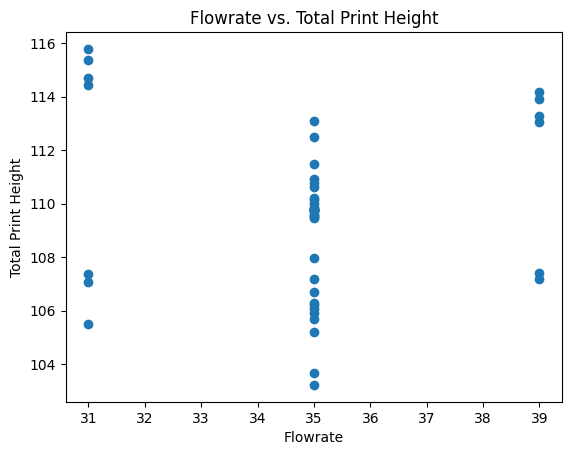

In [7]:
import matplotlib.pyplot as plt

plt.scatter(cube_df['Flowrate (Hz)'], cube_df['Total Print Height (mm)'])
plt.xlabel('Flowrate')
plt.ylabel('Total Print Height')
plt.title('Flowrate vs. Total Print Height')
plt.show()


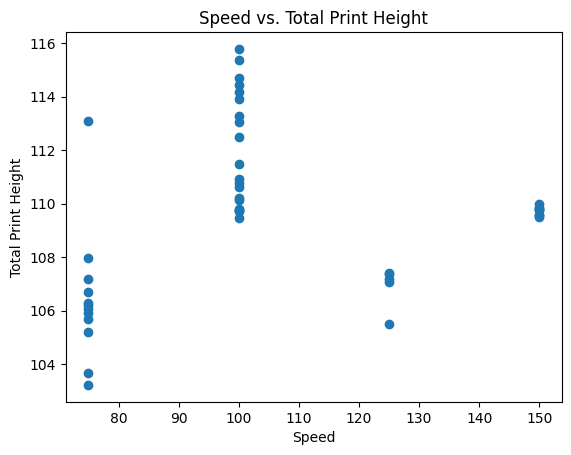

In [8]:
import matplotlib.pyplot as plt

plt.scatter(cube_df['Speed (mm/s)'], cube_df['Total Print Height (mm)'])
plt.xlabel('Speed')
plt.ylabel('Total Print Height')
plt.title('Speed vs. Total Print Height')
plt.show()


C:\Users\Ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

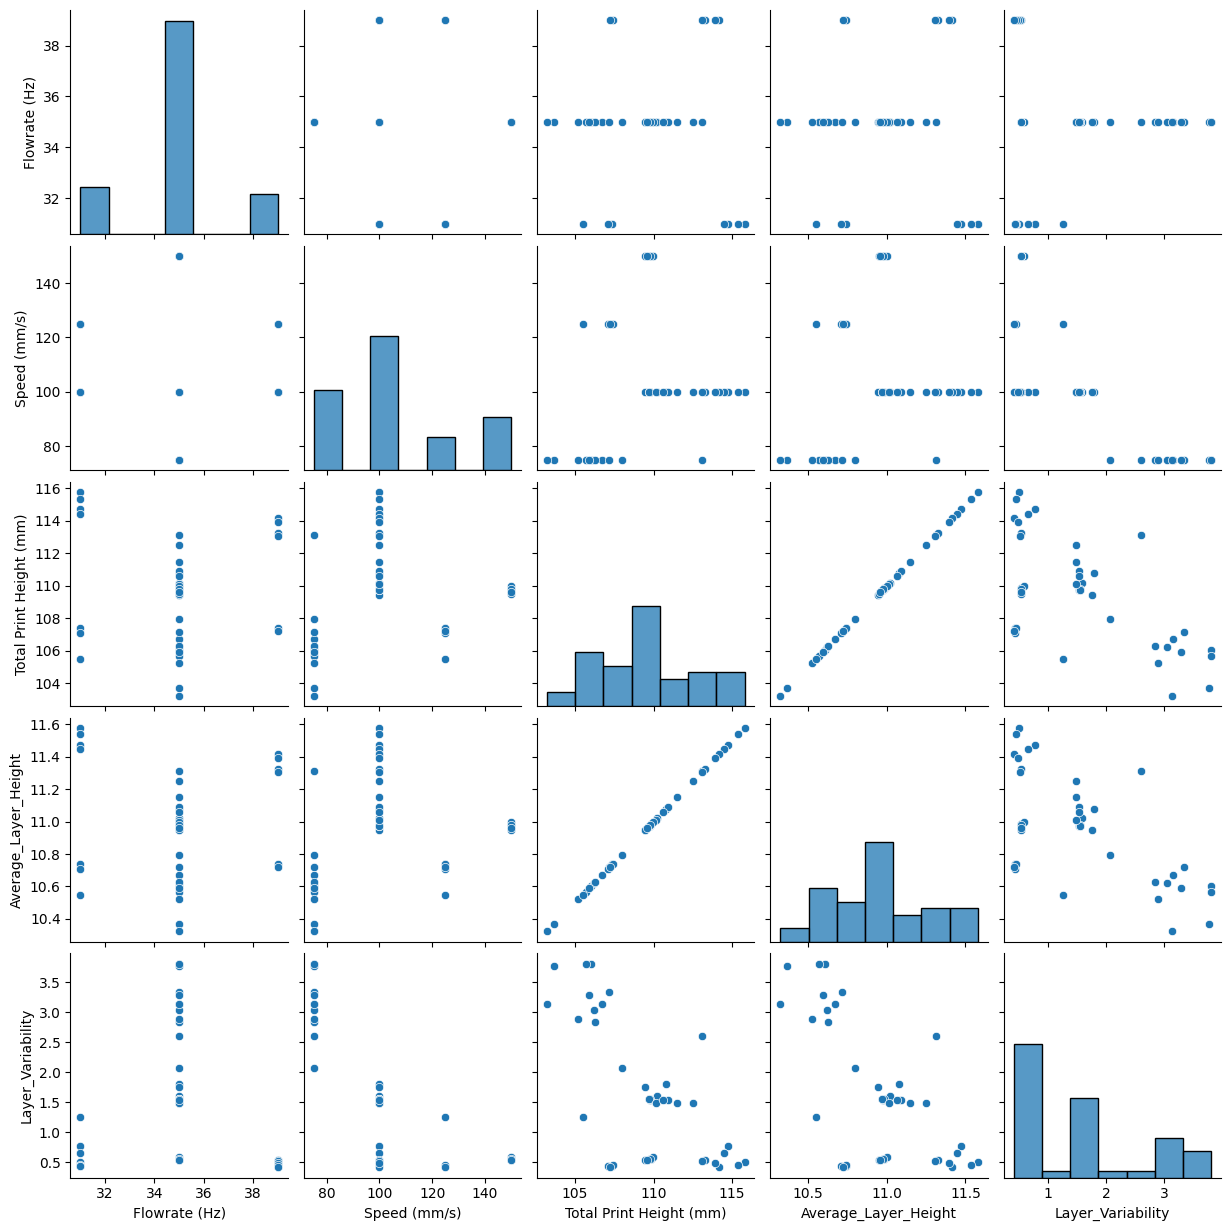

In [20]:
import seaborn as sns
# Calculate average layer height and layer variability (standard deviation)
layer_height_cols = [f'Layer {i} Height (mm)' for i in range(1, 11)]
cube_df['Average_Layer_Height'] = cube_df[layer_height_cols].mean(axis=1)
cube_df['Layer_Variability'] = cube_df[layer_height_cols].std(axis=1)

# Select columns for the pairplot
columns_to_plot = ['Flowrate (Hz)', 'Speed (mm/s)', 'Total Print Height (mm)', 'Average_Layer_Height', 'Layer_Variability']

# Create pairplot
sns.pairplot(cube_df[columns_to_plot])
plt.show()


# Model 1

In [12]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

# Features and target
X_cube = cube_df[['Flowrate (Hz)', 'Speed (mm/s)']]
Y_cube = cube_df['Total Print Height (mm)']  # or other material response

# Initialize model
model = LinearRegression()

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_cube, Y_cube, cv=kf, scoring='neg_mean_squared_error')

print("Cross-validated MSE:", -scores.mean())


Cross-validated MSE: 11.99043134010045


C:\Users\Ahmad\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Linear Regression Performance:
RMSE: 2.586
R^2 Score: -0.245
------------------------------
Gaussian Process Regression Performance:
RMSE: 2.325
R^2 Score: -0.006
------------------------------
Random Forest Regression Performance:
RMSE: 0.444
R^2 Score: 0.963
------------------------------
Support Vector Regression Performance:
RMSE: 1.815
R^2 Score: 0.386
------------------------------


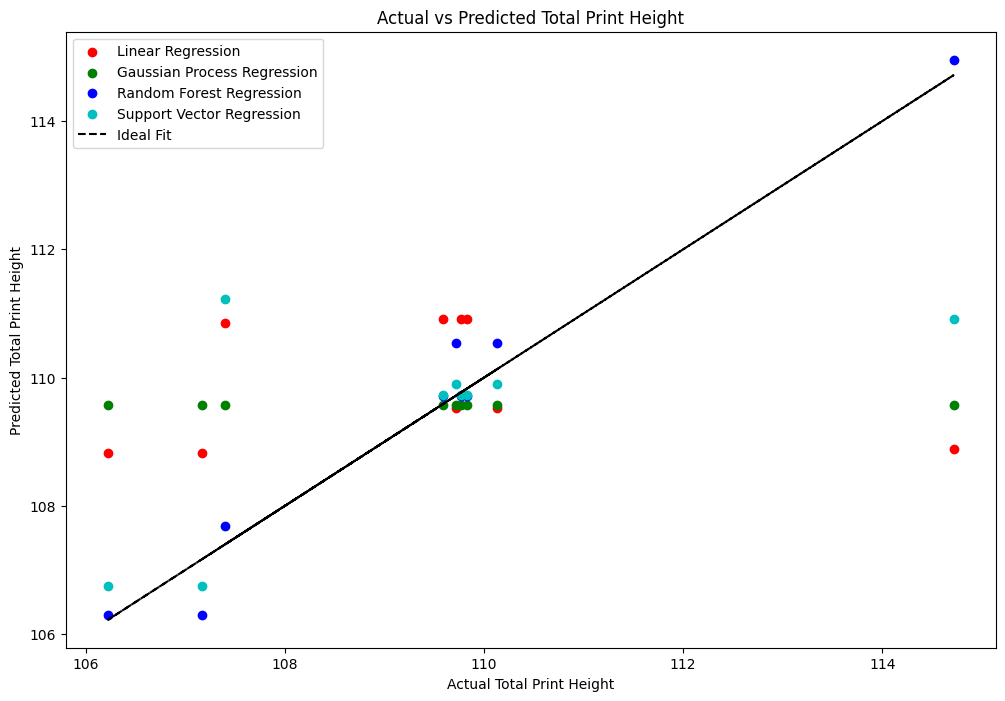

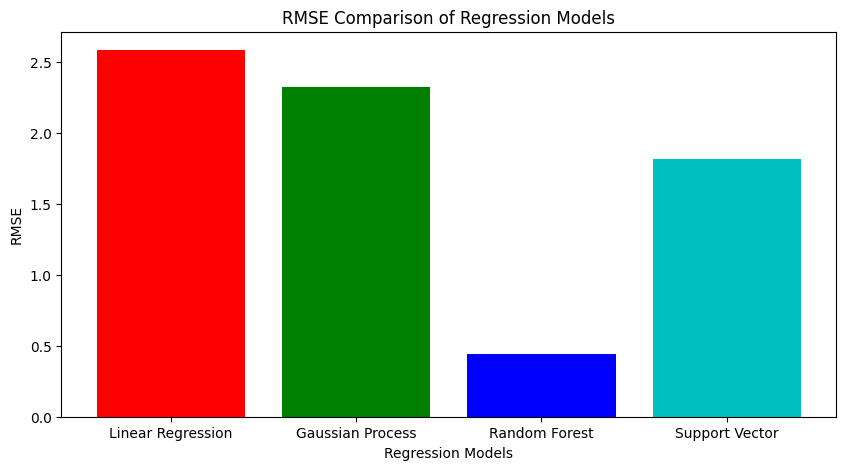

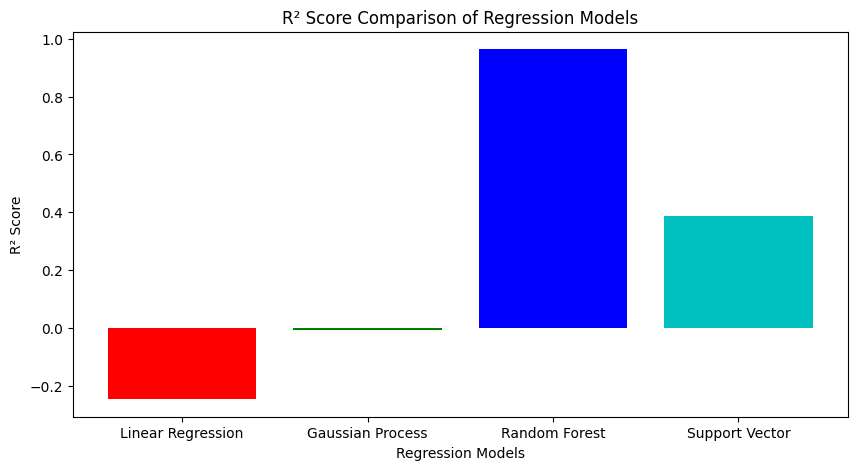

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel as C
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Load the cube dataset
cube_df = pd.read_csv('cube_dataset.csv')

# Handle failed prints: Remove rows with 'F' or 'Fail' entries
cube_df.replace({'F': np.nan, 'Fail': np.nan}, inplace=True)
cube_df.dropna(inplace=True)

# Convert data types to numeric
cube_df = cube_df.apply(pd.to_numeric)

# Reset index after dropping rows
cube_df.reset_index(drop=True, inplace=True)

# Features (Input variables)
X = cube_df[['Flowrate (Hz)', 'Speed (mm/s)']]

# Target variable (Material response)
y = cube_df['Total Print Height (mm)']  # Replace with the appropriate column if needed

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr_model = LinearRegression()

# Gaussian Process Regression
kernel = C(1.0) * Matern(length_scale=1.0, nu=1.5) + WhiteKernel()
gpr_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Support Vector Regression
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Linear Regression
lr_model.fit(X_train_scaled, y_train)

# Gaussian Process Regression
gpr_model.fit(X_train_scaled, y_train)

# Random Forest Regression
rf_model.fit(X_train_scaled, y_train)

# Support Vector Regression
svr_model.fit(X_train_scaled, y_train)


# Linear Regression Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Gaussian Process Regression Predictions
y_pred_gpr, y_std_gpr = gpr_model.predict(X_test_scaled, return_std=True)

# Random Forest Regression Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Support Vector Regression Predictions
y_pred_svr = svr_model.predict(X_test_scaled)


from sklearn.metrics import mean_squared_error, r2_score

# Function to calculate evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"R^2 Score: {r2:.3f}")
    print("-" * 30)
    return rmse, r2

# Evaluate Linear Regression
rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Evaluate Gaussian Process Regression
rmse_gpr, r2_gpr = evaluate_model(y_test, y_pred_gpr, "Gaussian Process Regression")

# Evaluate Random Forest Regression
rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf, "Random Forest Regression")

# Evaluate Support Vector Regression
rmse_svr, r2_svr = evaluate_model(y_test, y_pred_svr, "Support Vector Regression")


# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred_lr,
    'Gaussian Process Regression': y_pred_gpr,
    'Random Forest Regression': y_pred_rf,
    'Support Vector Regression': y_pred_svr
})

# Plot settings
plt.figure(figsize=(12, 8))

# Plot Actual vs Predicted for each model
models = ['Linear Regression', 'Gaussian Process Regression', 'Random Forest Regression', 'Support Vector Regression']
colors = ['r', 'g', 'b', 'c']

for i, model in enumerate(models):
    plt.scatter(results_df['Actual'], results_df[model], color=colors[i], label=model)

plt.plot(results_df['Actual'], results_df['Actual'], color='k', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Total Print Height')
plt.ylabel('Predicted Total Print Height')
plt.title('Actual vs Predicted Total Print Height')
plt.legend()
plt.show()


# Prepare data for plotting
model_names = ['Linear Regression', 'Gaussian Process', 'Random Forest', 'Support Vector']
rmse_values = [rmse_lr, rmse_gpr, rmse_rf, rmse_svr]
r2_values = [r2_lr, r2_gpr, r2_rf, r2_svr]

# Create a bar chart for RMSE
plt.figure(figsize=(10, 5))
plt.bar(model_names, rmse_values, color=colors)
plt.xlabel('Regression Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Regression Models')
plt.show()

# Create a bar chart for R² Score
plt.figure(figsize=(10, 5))
plt.bar(model_names, r2_values, color=colors)
plt.xlabel('Regression Models')
plt.ylabel('R² Score')
plt.title('R² Score Comparison of Regression Models')
plt.show()


## NN

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt

# For data preprocessing and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# For building the neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# Load the cube dataset
cube_df = pd.read_csv('cube_dataset.csv')

# Handle failed prints: Remove rows with 'F' or 'Fail' entries
cube_df.replace({'F': np.nan, 'Fail': np.nan}, inplace=True)
cube_df.dropna(inplace=True)

# Convert data types to numeric where appropriate
numeric_columns = ['Flowrate (Hz)', 'Speed (mm/s)', 'Total Print Height (mm)']
# Add layer height columns if they exist
layer_columns = [col for col in cube_df.columns if 'Layer' in col and 'Height' in col]
numeric_columns.extend(layer_columns)

# Convert numeric columns to numeric data types
cube_df[numeric_columns] = cube_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in numeric columns
cube_df.dropna(subset=numeric_columns, inplace=True)

# Reset index after dropping rows
cube_df.reset_index(drop=True, inplace=True)


In [3]:
# Features (Input variables): Flowrate and Speed
X = cube_df[['Flowrate (Hz)', 'Speed (mm/s)']]

# Target variable (Output): Total_Print_Height
y = cube_df['Total Print Height (mm)']


In [4]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))  # Input layer with 2 features
model.add(Dense(32, activation='relu'))               # Hidden layer
model.add(Dense(1))                                   # Output layer for regression


C:\Users\Ahmad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')


In [8]:
# Set up early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=8,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 11996.4639 - val_loss: 11724.3203
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12041.9141 - val_loss: 11683.8008
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11872.5557 - val_loss: 11644.9512
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11917.0947 - val_loss: 11608.3271
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11868.7061 - val_loss: 11569.8750
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11706.2344 - val_loss: 11527.5938
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11710.0137 - val_loss: 11481.2881
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11747.3672 - val_loss: 11429.5410
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11660.9902 - val_loss: 11372.0742
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11692.0117 - val_loss: 11307.0137
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11684.8740 - val_loss: 11

In [9]:
# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")

# Compute R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.3f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
RMSE: 8.723
R² Score: -13.168


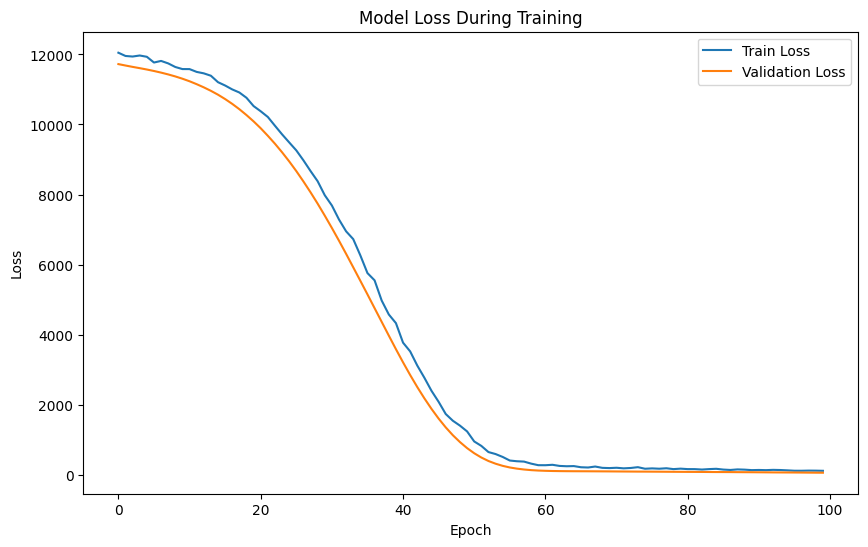

In [10]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


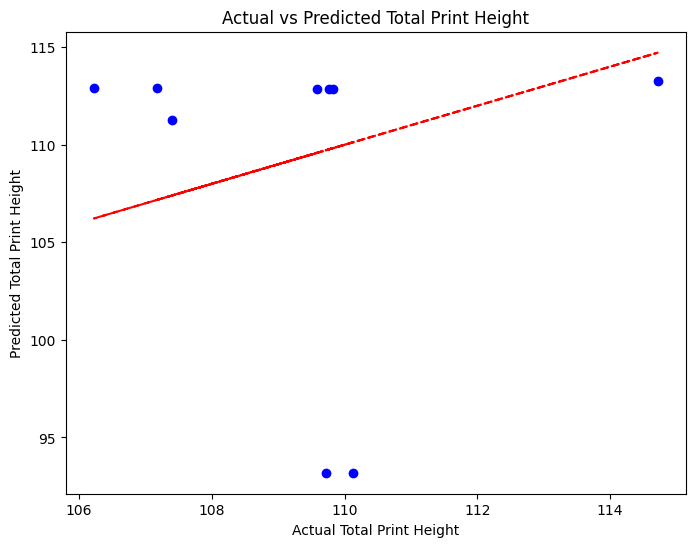

In [11]:
# Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='--')  # Ideal line
plt.xlabel('Actual Total Print Height')
plt.ylabel('Predicted Total Print Height')
plt.title('Actual vs Predicted Total Print Height')
plt.show()


# Model 2

In [27]:

# Features and target
X_cube = cube_df[['Flowrate (Hz)', 'Speed (mm/s)']]
Y_cube = cube_df['Total Print Height (mm)']  # or other material response

# Initialize and fit the model
model = LinearRegression()
model.fit(X_cube, Y_cube)

# Now the model is trained, and you can use it for predictions

desired_response = 50  # Example desired total print height

# Function to find the best parameters
def recommend_parameters(model, desired_response, flowrate_range, speed_range):
    import numpy as np

    best_params = None
    min_error = float('inf')

    # Search over possible values
    for flowrate in flowrate_range:
        for speed in speed_range:
            X_new = [[flowrate, speed]]
            predicted_response = model.predict(X_new)
            error = abs(predicted_response - desired_response)
            if error < min_error:
                min_error = error
                best_params = {'Flowrate': flowrate, 'Speed': speed}

    return best_params

# Define parameter ranges
flowrate_range = np.linspace(0.1, 1.0, 10)
speed_range = np.linspace(10, 100, 10)

# Get recommendations
best_params = recommend_parameters(model, desired_response, flowrate_range, speed_range)
print("Recommended Parameters:", best_params)


Recommended Parameters: {'Flowrate': 1.0, 'Speed': 10.0}


C:\Users\Ahmad\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ahmad\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ahmad\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ahmad\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ahmad\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ahmad\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not ha

# Model 3

In [31]:
# Assume intended layer height is 1 mm
intended_layer_height = 10

# Calculate percentage error for each layer
for i in range(1, 11):
    cube_df[f'Layer{i}_Perc_Error'] = ((cube_df[f'Layer {i} Height (mm)'] - intended_layer_height) / intended_layer_height) * 100

# Calculate layer variability (standard deviation)
layer_height_cols = [f'Layer {i} Height (mm)' for i in range(1, 11)]
cube_df['Layer_Std_Dev'] = cube_df[layer_height_cols].std(axis=1)


In [33]:
print(cube_df[['Layer_Std_Dev']].describe())


       Layer_Std_Dev
count      45.000000
mean        1.521770
std         1.111740
min         0.417995
25%         0.547460
50%         1.488594
75%         2.070744
max         3.804063


In [34]:
def classify_print(row):
    max_perc_error = row[[f'Layer{i}_Perc_Error' for i in range(1, 11)]].abs().max()
    layer_std_dev = row['Layer_Std_Dev']
    
    if max_perc_error > 2 or layer_std_dev > 0.2:
        return 'Bad'
    else:
        return 'Good'

cube_df['Print_Quality'] = cube_df.apply(classify_print, axis=1)


# Printability Map

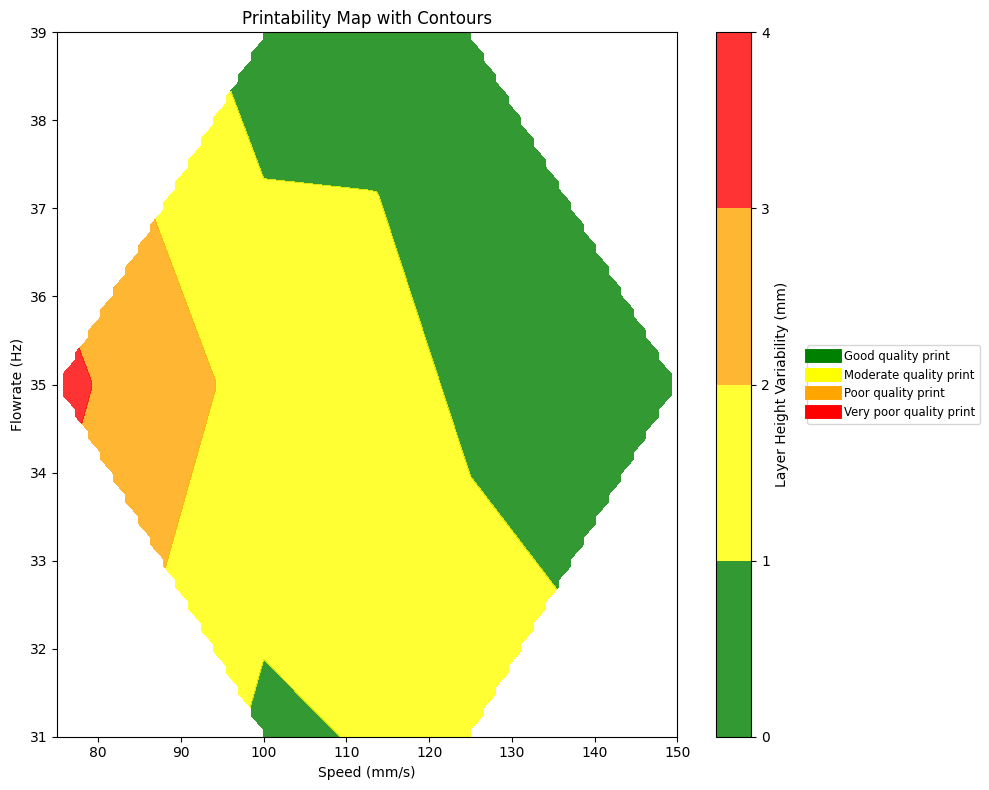

In [11]:
from scipy.interpolate import griddata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Full_dataset.csv')
# Extract data for contour plotting
x = data['Speed (mm/s)']
y = data['Flowrate (Hz)']
z = data['layer_var']

# Generate a grid for contour plotting
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')

# Define thresholds for printability regions
levels = [0, 1, 2, 3, 4]  # Example thresholds for metric0
colors = ['green', 'yellow', 'orange', 'red']  # Good quality to poor quality

# Plot the contour map
# Adjust the legend placement further to the right
plt.figure(figsize=(10, 8))

# Plot the contour map
contour = plt.contourf(xi, yi, zi, levels=levels, colors=colors, alpha=0.8)
colorbar = plt.colorbar(label='Layer Height Variability (mm)')

# Label the axes
plt.xlabel('Speed (mm/s)')
plt.ylabel('Flowrate (Hz)')
plt.title('Printability Map with Contours')

# Adjust legend placement further to the right
legend_patches = [plt.Line2D([0], [0], color=color, lw=10, label=label) 
                  for color, label in zip(colors, legend_labels)]
plt.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1.2, 0.5), fontsize='small')

plt.tight_layout()
plt.show()


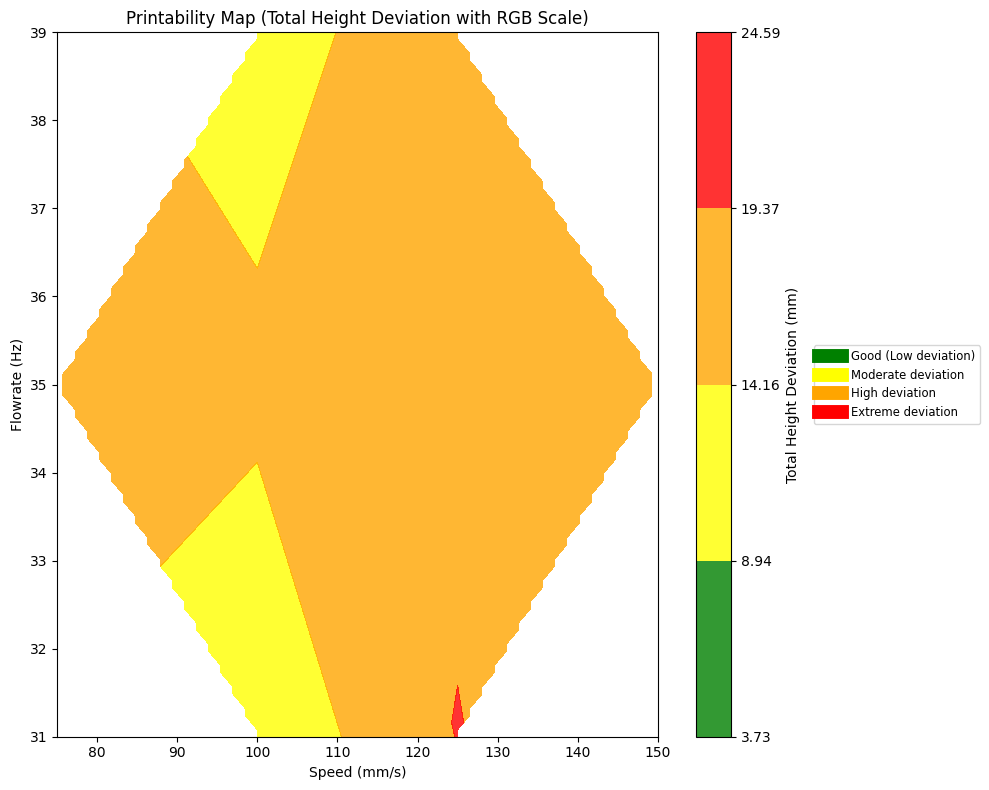

In [20]:
# Import necessary libraries
from scipy.interpolate import griddata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Full_dataset.csv')

# Extract data for contour plotting
x = data['Speed (mm/s)']
y = data['Flowrate (Hz)']
z_total_height = data['total_height_deviation']  # Total height deviation data

# Generate grid for contour plotting
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
zi_total_height = griddata((x, y), z_total_height, (xi[None, :], yi[:, None]), method='linear')

# Adjust thresholds dynamically to better represent the range of total height deviations
min_deviation = z_total_height.min()
max_deviation = z_total_height.max()
thresholds = np.linspace(min_deviation, max_deviation, 5)  # Divide the range into 4 equal parts
# Define clear color and scale categories for the legend
colors_rgb = ['green', 'yellow', 'orange', 'red']
legend_labels_rgb = ["Good (Low deviation)", "Moderate deviation", "High deviation", "Extreme deviation"]

# Plot the contour map with RGB color scale and enhanced legend
plt.figure(figsize=(10, 8))
contour = plt.contourf(xi, yi, zi_total_height, levels=thresholds, colors=colors_rgb, alpha=0.8)
colorbar = plt.colorbar(label='Total Height Deviation (mm)')

# Label the axes
plt.xlabel('Speed (mm/s)')
plt.ylabel('Flowrate (Hz)')
plt.title('Printability Map (Total Height Deviation with RGB Scale)')

# Enhanced legend with clear labels
legend_patches_rgb = [plt.Line2D([0], [0], color=color, lw=10, label=label) 
                      for color, label in zip(colors_rgb, legend_labels_rgb)]
plt.legend(handles=legend_patches_rgb, loc='center left', bbox_to_anchor=(1.25, 0.5), fontsize='small')

# Final layout adjustments and show the plot
plt.tight_layout()
plt.show()
